In [1]:
import pandas as pd

# Đọc file Excel
data = pd.read_excel("data.xlsx")
data.rename(columns={"SR4": "ST4"}, inplace=True)

# Xem 5 dòng đầu
data.head()

# Kiểm tra thông tin cơ bản
data.info()

# Kiểm tra giá trị thiếu
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  199 non-null    object
 1   Age     199 non-null    object
 2   Income  199 non-null    object
 3   Edu     199 non-null    object
 4   TOUI    199 non-null    int64 
 5   ST1     199 non-null    int64 
 6   ST2     199 non-null    int64 
 7   ST3     199 non-null    int64 
 8   ST4     199 non-null    int64 
 9   SQ1     199 non-null    int64 
 10  SQ2     199 non-null    int64 
 11  SQ3     199 non-null    int64 
 12  SQ4     199 non-null    int64 
 13  SQ5     199 non-null    int64 
 14  FOMO1   199 non-null    int64 
 15  FOMO2   199 non-null    int64 
 16  FOMO3   199 non-null    int64 
 17  FOMO4   199 non-null    int64 
 18  FOMO5   199 non-null    int64 
 19  PU1     199 non-null    int64 
 20  PU2     199 non-null    int64 
 21  PU3     199 non-null    int64 
 22  PU4     199 non-null    in

Gender    0
Age       0
Income    0
Edu       0
TOUI      0
ST1       0
ST2       0
ST3       0
ST4       0
SQ1       0
SQ2       0
SQ3       0
SQ4       0
SQ5       0
FOMO1     0
FOMO2     0
FOMO3     0
FOMO4     0
FOMO5     0
PU1       0
PU2       0
PU3       0
PU4       0
PU5       0
BE1       0
BE2       0
BE3       0
BE4       0
BE5       0
SE1       0
SE2       0
SE3       0
SE4       0
US1       0
US2       0
US3       0
US4       0
US5       0
dtype: int64

In [2]:
!pip install openpyxl



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


LÀM SẠCH DỮ LIỆU

In [3]:
data.info()
data.describe()
data.isnull().sum()
data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  199 non-null    object
 1   Age     199 non-null    object
 2   Income  199 non-null    object
 3   Edu     199 non-null    object
 4   TOUI    199 non-null    int64 
 5   ST1     199 non-null    int64 
 6   ST2     199 non-null    int64 
 7   ST3     199 non-null    int64 
 8   ST4     199 non-null    int64 
 9   SQ1     199 non-null    int64 
 10  SQ2     199 non-null    int64 
 11  SQ3     199 non-null    int64 
 12  SQ4     199 non-null    int64 
 13  SQ5     199 non-null    int64 
 14  FOMO1   199 non-null    int64 
 15  FOMO2   199 non-null    int64 
 16  FOMO3   199 non-null    int64 
 17  FOMO4   199 non-null    int64 
 18  FOMO5   199 non-null    int64 
 19  PU1     199 non-null    int64 
 20  PU2     199 non-null    int64 
 21  PU3     199 non-null    int64 
 22  PU4     199 non-null    in

np.int64(15)

KIỂM ĐỊNH ĐỘ TIN CẬY THANG ĐO (Cronbach’s α)

In [4]:
# Bước 2: Cronbach's Alpha và phân tích item
import pandas as pd
import numpy as np

# giả sử data đã nạp và tên là `data`
# xác nhận lại các nhóm biến (đã chỉnh ST4)
scarcity_cols = ['ST1', 'ST2', 'ST3', 'ST4','SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5']
scarcity_time_cols = ['ST1', 'ST2', 'ST3', 'ST4']
scarcity_quantity_cols = ['SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5']
fomo_cols     = ['FOMO1', 'FOMO2', 'FOMO3', 'FOMO4', 'FOMO5']
pu_cols       = ['PU1', 'PU2', 'PU3', 'PU4', 'PU5']
be_cols       = ['BE1', 'BE2', 'BE3', 'BE4', 'BE5']
se_cols       = ['SE1', 'SE2', 'SE3', 'SE4']
us_cols       = ['US1', 'US2', 'US3', 'US4', 'US5']

groups = {
    "Scarcity": scarcity_cols,
    "FOMO": fomo_cols,
    "PU": pu_cols,
    "BE": be_cols,
    "SE": se_cols,
    "US": us_cols
}

def cronbach_alpha(df_items):
    """Cronbach's alpha bằng công thức: alpha = (N/(N-1))*(1 - sum(var_i)/var_total)"""
    df = df_items.dropna(axis=0, how='any')  # loại hàng có missing nếu có
    item_vars = df.var(axis=0, ddof=1)
    total_var = df.sum(axis=1).var(ddof=1)
    N = df.shape[1]
    if N <= 1:
        return np.nan
    alpha = (N / (N - 1)) * (1 - item_vars.sum() / total_var)
    return alpha

def item_total_correlations(df_items):
    """Tính hệ số tương quan giữa từng item và tổng của các item còn lại (item-total)"""
    res = {}
    for col in df_items.columns:
        others = df_items.drop(columns=[col]).sum(axis=1)
        r = df_items[col].corr(others)
        res[col] = r
    return res

def alpha_if_item_deleted(df_items):
    """Tính α nếu loại từng item"""
    res = {}
    for col in df_items.columns:
        df2 = df_items.drop(columns=[col])
        res[col] = cronbach_alpha(df2)
    return res

# Chạy cho từng nhóm và in kết quả
for name, cols in groups.items():
    print("=== Nhóm:", name, " (", len(cols), "items ) ===")
    # kiểm tra tồn tại các cột
    missing_cols = [c for c in cols if c not in data.columns]
    if missing_cols:
        print("  Lỗi: thiếu cột trong dữ liệu:", missing_cols)
        print()
        continue

    df_grp = data[cols].astype(float)  # đảm bảo kiểu số
    alpha = cronbach_alpha(df_grp)
    print(f"  Cronbach's alpha = {alpha:.3f}")

    # item-total correlations
    itc = item_total_correlations(df_grp)
    print("  Item-total correlations:")
    for k, v in itc.items():
        print(f"    {k}: {v:.3f}")

    # alpha if item deleted
    a_del = alpha_if_item_deleted(df_grp)
    print("  Alpha if item deleted:")
    for k, v in a_del.items():
        print(f"    drop {k}: alpha = {v:.3f}")
    print()
#Kết luận Bước 2: Tất cả α > 0.9 → rất tốt, thang đo đáng tin cậy, không cần loại mục nào. Không có item nào làm tăng alpha nếu bị loại → giữ nguyên toàn bộ 38 câu hỏi.

=== Nhóm: Scarcity  ( 9 items ) ===
  Cronbach's alpha = 0.945
  Item-total correlations:
    ST1: 0.719
    ST2: 0.770
    ST3: 0.793
    ST4: 0.783
    SQ1: 0.785
    SQ2: 0.787
    SQ3: 0.786
    SQ4: 0.823
    SQ5: 0.816
  Alpha if item deleted:
    drop ST1: alpha = 0.942
    drop ST2: alpha = 0.939
    drop ST3: alpha = 0.938
    drop ST4: alpha = 0.939
    drop SQ1: alpha = 0.938
    drop SQ2: alpha = 0.938
    drop SQ3: alpha = 0.938
    drop SQ4: alpha = 0.936
    drop SQ5: alpha = 0.937

=== Nhóm: FOMO  ( 5 items ) ===
  Cronbach's alpha = 0.919
  Item-total correlations:
    FOMO1: 0.815
    FOMO2: 0.814
    FOMO3: 0.850
    FOMO4: 0.718
    FOMO5: 0.763
  Alpha if item deleted:
    drop FOMO1: alpha = 0.896
    drop FOMO2: alpha = 0.896
    drop FOMO3: alpha = 0.888
    drop FOMO4: alpha = 0.915
    drop FOMO5: alpha = 0.907

=== Nhóm: PU  ( 5 items ) ===
  Cronbach's alpha = 0.943
  Item-total correlations:
    PU1: 0.838
    PU2: 0.876
    PU3: 0.833
    PU4: 0.870
    PU

TẠO BIẾN TỔNG HỢP, PHÂN TÍCH MÔ TẢ

                   count      mean       std  min   25%   50%   75%  max
scarcity_time      199.0  4.600503  1.564061  1.0  3.50  4.75  5.75  7.0
scarcity_quantity  199.0  4.698492  1.601372  1.0  3.80  5.20  6.00  7.0
FOMO               199.0  4.442211  1.631331  1.0  3.10  4.80  5.80  7.0
PU                 199.0  4.625126  1.626290  1.0  3.50  5.00  5.90  7.0
BE                 199.0  4.648241  1.605950  1.0  3.20  5.20  6.00  7.0
SE                 199.0  4.218593  1.632593  1.0  2.75  4.00  5.50  7.0
US                 199.0  4.299497  1.624916  1.0  3.00  4.20  5.80  7.0


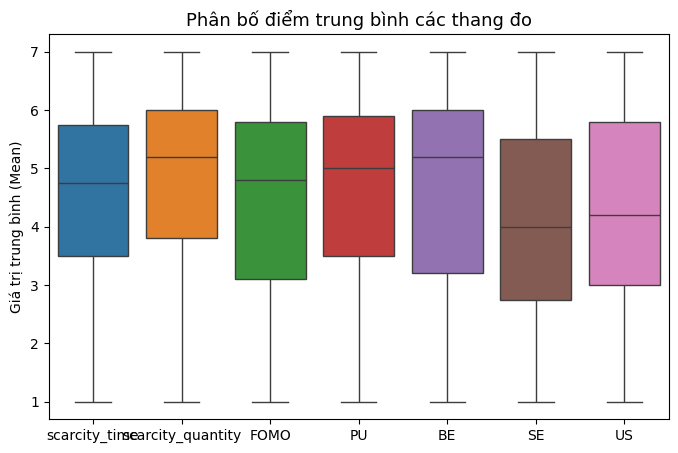

In [5]:
# Bước 3: Tạo biến tổng hợp
data['Scarcity'] = data[['ST1','ST2','ST3','ST4','SQ1','SQ2','SQ3','SQ4','SQ5']].mean(axis=1)
data['scarcity_time'] = data[['ST1','ST2','ST3','ST4']].mean(axis=1)
data['scarcity_quantity'] = data[['SQ1','SQ2','SQ3','SQ4','SQ5']].mean(axis=1)
data['FOMO'] = data[['FOMO1','FOMO2','FOMO3','FOMO4','FOMO5']].mean(axis=1)
data['PU'] = data[['PU1','PU2','PU3','PU4','PU5']].mean(axis=1)
data['BE'] = data[['BE1','BE2','BE3','BE4','BE5']].mean(axis=1)
data['SE'] = data[['SE1','SE2','SE3','SE4']].mean(axis=1)
data['US'] = data[['US1','US2','US3','US4','US5']].mean(axis=1)

# Thống kê mô tả
desc = data[['scarcity_time','scarcity_quantity','FOMO','PU','BE','SE','US']].describe().T
print(desc)

# (Tuỳ chọn) Vẽ boxplot để xem phân bố
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.boxplot(data=data[['scarcity_time','scarcity_quantity','FOMO','PU','BE','SE','US']])
plt.title("Phân bố điểm trung bình các thang đo", fontsize=13)
plt.ylabel("Giá trị trung bình (Mean)")
plt.savefig('Phân bố điểm trung bình các thang đo')
plt.show()
#Tất cả các thang đo đạt độ tin cậy cao (Cronbach’s alpha > 0.9) và dữ liệu mô tả ổn định → Không cần loại biến hay xử lý thêm.

PHÂN TÍCH NHÂN TỐ KHÁM PHÁ (EFA)

In [6]:
!pip install factor_analyzer



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [7]:
import pandas as pd
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_kmo, calculate_bartlett_sphericity

In [8]:
cols = ['ST1','ST2','ST3','ST4','SQ1','SQ2','SQ3','SQ4','SQ5',
        'FOMO1','FOMO2','FOMO3','FOMO4','FOMO5',
        'PU1','PU2','PU3','PU4','PU5',
        'BE1','BE2','BE3','BE4','BE5',
        'SE1','SE2','SE3','SE4',
        'US1','US2','US3','US4','US5']
data_factors = data[cols]

In [9]:
# Kiểm tra độ phù hợp của dữ liệu cho EFA
kmo_all, kmo_model = calculate_kmo(data_factors)
chi_square_value, p_value = calculate_bartlett_sphericity(data_factors)

print(f"KMO overall: {kmo_model}")
print(f"Bartlett’s Test p-value: {p_value}")
#đọc kết quả: KMO > 0.6 → dữ liệu phù hợp để làm EFA. Bartlett’s Test p < 0.05 → các biến có tương quan, nên chạy EFA được.

KMO overall: 0.9402103147884301
Bartlett’s Test p-value: 0.0


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


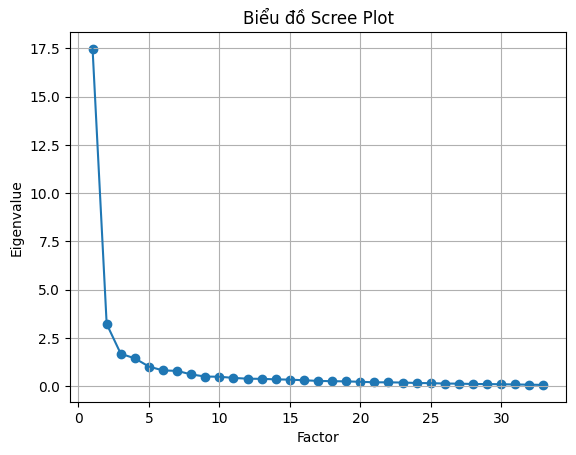

In [10]:
# Kiểm tra eigenvalues để xác định số nhân tố nên giữ lại
fa = FactorAnalyzer(rotation=None)
fa.fit(data_factors)
ev, v = fa.get_eigenvalues()

# Hiển thị eigenvalues
import matplotlib.pyplot as plt

plt.scatter(range(1, data_factors.shape[1]+1), ev)
plt.plot(range(1, data_factors.shape[1]+1), ev)
plt.title('Biểu đồ Scree Plot')
plt.xlabel('Factor')
plt.ylabel('Eigenvalue')
plt.grid()
plt.savefig('biểu đồ scree plot')
plt.show()

Khi EFA xác định được 6 nhân tố, điều đó nghĩa là:
Tập hợp các biến quan sát (câu hỏi trong bảng khảo sát) được gộp lại thành 6 nhóm chính.
Các nhân tố khác (từ nhân tố thứ 7 trở đi) có Eigenvalue < 1, nên không đủ điều kiện để được giữ lại (vì chúng giải thích rất ít phương sai, < 1 biến gốc).
Nói cách khác, mô hình ban đầu có thể có 6 thang đo lý thuyết, và EFA xác nhận đúng 6 nhóm là phù hợp — các nhóm khác (nếu có) chỉ là nhiễu, không có ý nghĩa.

                   scarcity_time  scarcity_quantity      FOMO        PU  \
scarcity_time           1.000000           0.790713  0.757043  0.795311   
scarcity_quantity       0.790713           1.000000  0.765768  0.798346   
FOMO                    0.757043           0.765768  1.000000  0.814832   
PU                      0.795311           0.798346  0.814832  1.000000   
BE                      0.678584           0.706861  0.656366  0.791760   
SE                      0.149708           0.146075  0.128692  0.206308   
US                      0.661174           0.656910  0.712511  0.718271   

                         BE        SE        US  
scarcity_time      0.678584  0.149708  0.661174  
scarcity_quantity  0.706861  0.146075  0.656910  
FOMO               0.656366  0.128692  0.712511  
PU                 0.791760  0.206308  0.718271  
BE                 1.000000  0.175682  0.641944  
SE                 0.175682  1.000000  0.024220  
US                 0.641944  0.024220  1.000000  

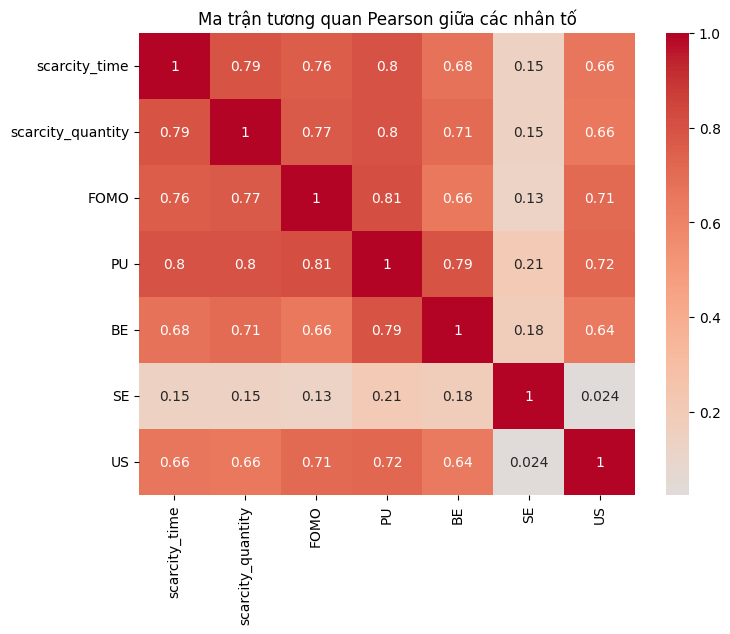

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
factors = data[['scarcity_time','scarcity_quantity', 'FOMO', 'PU', 'BE', 'SE', 'US']]

# Tính ma trận tương quan Pearson
corr_matrix = factors.corr(method='pearson')
print(corr_matrix)

# Vẽ biểu đồ heatmap để trực quan hoá
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Ma trận tương quan Pearson giữa các nhân tố")
plt.savefig("Ma trận tương quan Pearson giữa các nhân tố")
plt.show()


PHÂN TÍCH HỒI QUY ĐA BIẾN

In [12]:
!pip install statsmodels



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


In [13]:
import statsmodels.api as sm

# Xác định biến độc lập và phụ thuộc
X = data[['Scarcity', 'FOMO', 'PU', 'BE', 'SE']]
y = data['US']

# Thêm hằng số vào mô hình
X = sm.add_constant(X)

# Chạy hồi quy tuyến tính đa biến
model = sm.OLS(y, X).fit()

# In kết quả
print(model.summary())
print ('Durbin–Watson = 1.921 → Không có tự tương quan phần dư (vì DW nằm trong khoảng 1.5–2.5).Kiểm định Jarque–Bera có p = 0.0009 < 0.05 → Phần dư hơi lệch chuẩn nhẹ, nhưng mức độ chấp nhận được. Cond. No. = 42.5 (< 100) → Không có vấn đề đa cộng tuyến nghiêm trọng.')

                            OLS Regression Results                            
Dep. Variable:                     US   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     56.64
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           4.76e-36
Time:                        05:50:51   Log-Likelihood:                -288.61
No. Observations:                 199   AIC:                             589.2
Df Residuals:                     193   BIC:                             609.0
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8181      0.297      2.759      0.0

In [14]:
!pip install pingouin



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python3 -m pip install --upgrade pip


TÁC ĐỘNG GIÁN TIẾP

In [15]:
import pandas as pd
from statsmodels.stats.mediation import Mediation
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
model_direct = smf.ols("US ~ Scarcity + FOMO", data=data).fit()
print(model_direct.summary())

                            OLS Regression Results                            
Dep. Variable:                     US   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.546
Method:                 Least Squares   F-statistic:                     119.8
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           1.01e-34
Time:                        05:50:52   Log-Likelihood:                -298.99
No. Observations:                 199   AIC:                             604.0
Df Residuals:                     196   BIC:                             613.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6335      0.255      2.481      0.0

In [16]:
model_direct = smf.ols("US ~ Scarcity + PU", data=data).fit()
print(model_direct.summary())

                            OLS Regression Results                            
Dep. Variable:                     US   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.540
Method:                 Least Squares   F-statistic:                     117.1
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           3.49e-34
Time:                        05:50:52   Log-Likelihood:                -300.26
No. Observations:                 199   AIC:                             606.5
Df Residuals:                     196   BIC:                             616.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6209      0.257      2.411      0.0

In [17]:
import pingouin as pg
import pandas as pd

# Mediation Scarcity -> FOMO -> US
med_fomo = pg.mediation_analysis(data=data, x='Scarcity', m='FOMO', y='US', 
                                alpha=0.05, n_boot=5000)
print("=== Mediation: Scarcity -> FOMO -> US ===")
print(med_fomo)

# Mediation Scarcity -> PU -> US
med_pu = pg.mediation_analysis(data=data, x='Scarcity', m='PU', y='US',
                               alpha=0.05, n_boot=5000)
print("\n=== Mediation: Scarcity -> PU -> US ===")
print(med_pu)


=== Mediation: Scarcity -> FOMO -> US ===
       path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0  FOMO ~ X  0.874443  0.045992  1.866499e-46  0.783744   0.965143  Yes
1  Y ~ FOMO  0.709710  0.049795  3.857381e-32  0.611511   0.807909  Yes
2     Total  0.753078  0.055415  4.139432e-30  0.643795   0.862362  Yes
3    Direct  0.375572  0.087332  2.685615e-05  0.203340   0.547804  Yes
4  Indirect  0.377506  0.108013  0.000000e+00  0.192761   0.603810  Yes

=== Mediation: Scarcity -> PU -> US ===
       path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0    PU ~ X  0.911870  0.041700  1.364774e-54  0.829634   0.994105  Yes
1    Y ~ PU  0.717665  0.049529  7.256727e-33  0.619989   0.815340  Yes
2     Total  0.753078  0.055415  4.139432e-30  0.643795   0.862362  Yes
3    Direct  0.338146  0.096634  5.774677e-04  0.147569   0.528723  Yes
4  Indirect  0.414932  0.097712  0.000000e+00  0.217179   0.603201  Yes


TÁC ĐỘNG TRỰC TIẾP

In [18]:
#Scarcity ảnh hưởng trực tiếp đến US
model_direct = smf.ols("US ~ Scarcity", data=data).fit()
print(model_direct.summary())

                            OLS Regression Results                            
Dep. Variable:                     US   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.481
Method:                 Least Squares   F-statistic:                     184.7
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           4.14e-30
Time:                        05:50:55   Log-Likelihood:                -312.67
No. Observations:                 199   AIC:                             629.3
Df Residuals:                     197   BIC:                             635.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7940      0.271      2.930      0.0

In [19]:
#Scarcity, bE ảnh hưởng trực tiếp đến US
model_direct = smf.ols("US ~ Scarcity + BE", data=data).fit()
print(model_direct.summary())

                            OLS Regression Results                            
Dep. Variable:                     US   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.517
Method:                 Least Squares   F-statistic:                     106.8
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           4.27e-32
Time:                        05:50:55   Log-Likelihood:                -305.14
No. Observations:                 199   AIC:                             616.3
Df Residuals:                     196   BIC:                             626.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5065      0.272      1.865      0.0

In [20]:
#Scarcity, SE ảnh hưởng trực tiếp đến US
model_direct = smf.ols("US ~ Scarcity + SE", data=data).fit()
print(model_direct.summary())

                            OLS Regression Results                            
Dep. Variable:                     US   R-squared:                       0.491
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     94.59
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           1.77e-29
Time:                        05:50:55   Log-Likelihood:                -311.25
No. Observations:                 199   AIC:                             628.5
Df Residuals:                     196   BIC:                             638.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.0886      0.322      3.380      0.0



--- THỐNG KÊ MÔ TẢ BIẾN NHÂN KHẨU HỌC ---

--- Phân tích biến: Gender ---
        Tần suất (Count)  Tỷ lệ (%)
Gender                             
Nữ                   115      57.79
Nam                   84      42.21


/tmp/ipykernel_1732/1546645653.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')


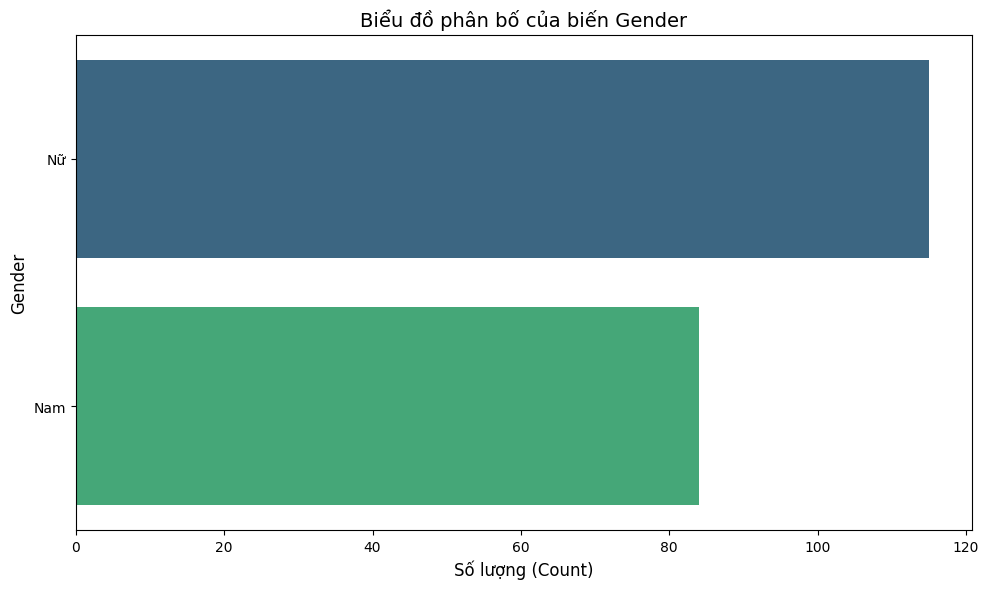


--- Phân tích biến: Age ---
                   Tần suất (Count)  Tỷ lệ (%)
Age                                           
Từ 18 đến 24 tuổi               138      69.35
Trên 25 tuổi                     61      30.65


/tmp/ipykernel_1732/1546645653.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')


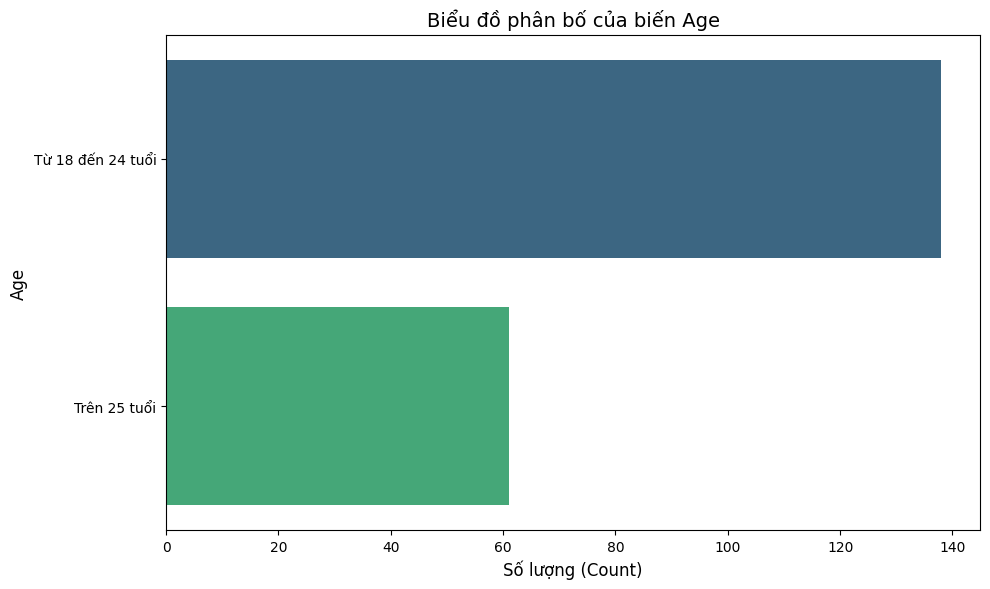


--- Phân tích biến: Income ---
                                       Tần suất (Count)  Tỷ lệ (%)
Income                                                            
Từ 2 triệu đồng đến dưới 5 triệu đồng                73      36.68
Từ 0 đến dưới 2 triệu đồng                           67      33.67
Trên 5 triệu đồng                                    59      29.65


/tmp/ipykernel_1732/1546645653.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')


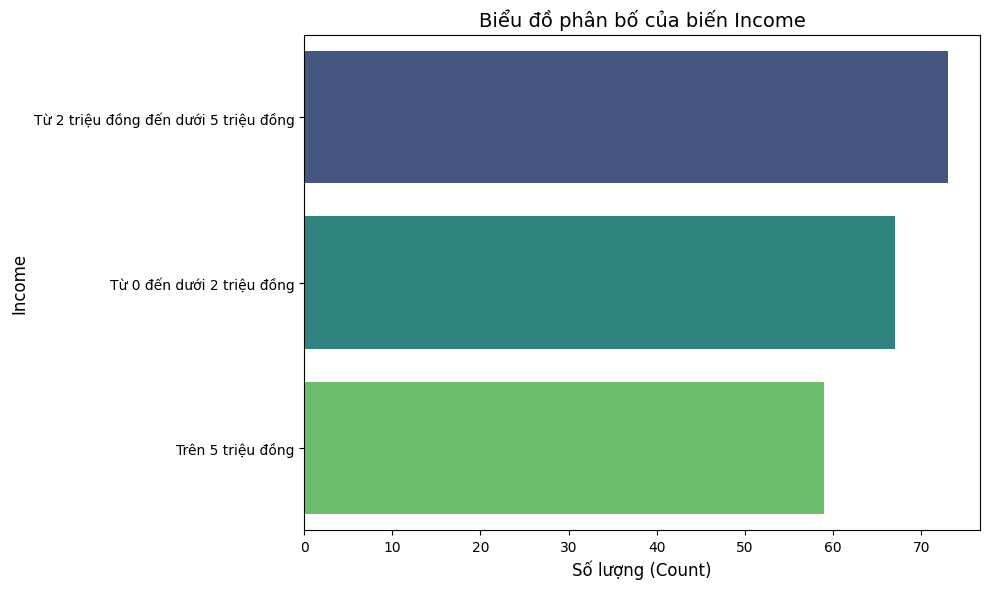


--- Phân tích biến: Edu ---
                       Tần suất (Count)  Tỷ lệ (%)
Edu                                               
Đang theo học đại học               134      67.34
Tốt nghiệp cử nhân                   65      32.66


/tmp/ipykernel_1732/1546645653.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')


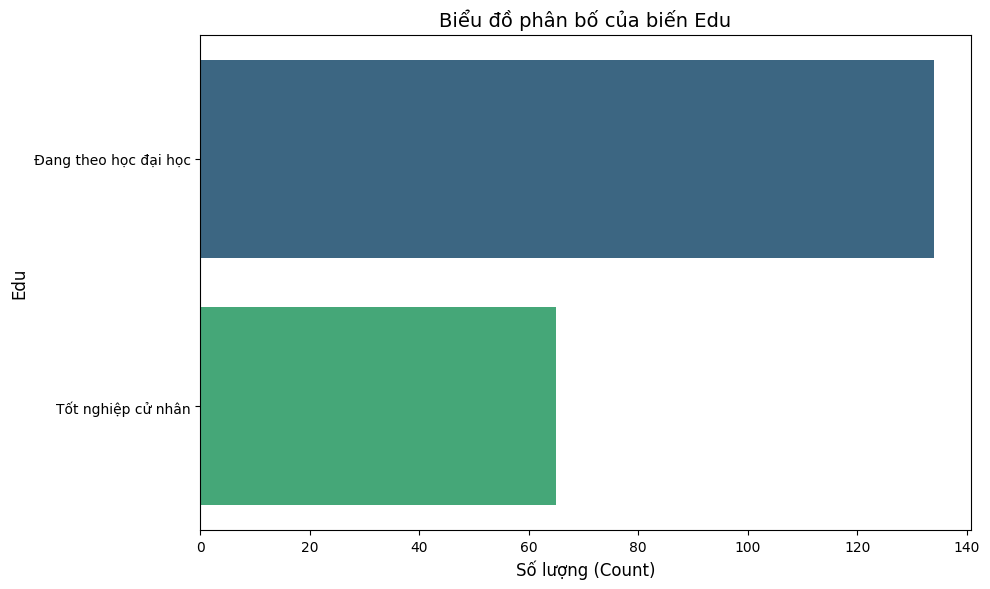


--- Phân tích biến: TOUI ---
count    199.000000
mean       5.562814
std        1.846324
min        1.000000
25%        4.000000
50%        6.000000
75%        7.000000
max        8.000000
Name: TOUI, dtype: float64


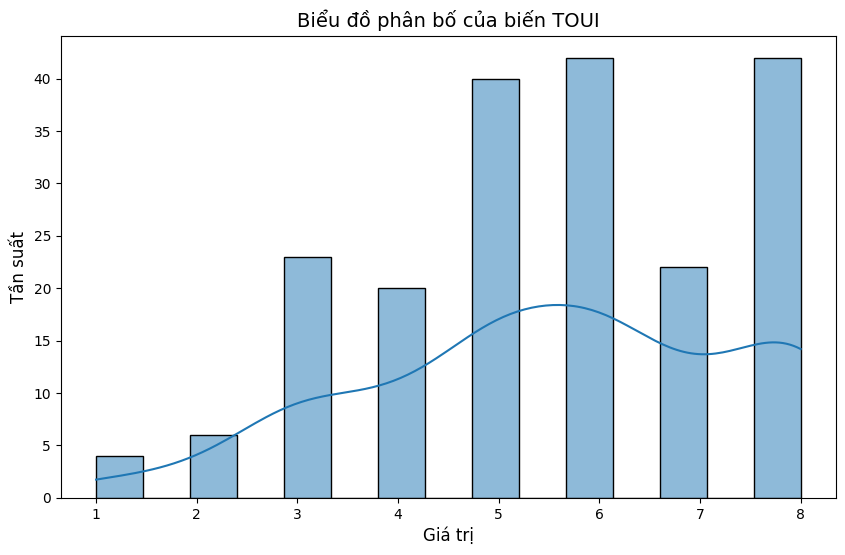

In [21]:
# PHẦN BỔ SUNG: THỐNG KÊ MÔ TẢ BIẾN NHÂN KHẨU HỌC
# ==============================================================================
import seaborn as sns
import matplotlib.pyplot as plt

print("\n\n--- THỐNG KÊ MÔ TẢ BIẾN NHÂN KHẨU HỌC ---")

# Danh sách các biến nhân khẩu học dạng phân loại
demographic_categorical_cols = ['Gender', 'Age', 'Income', 'Edu']

# Lặp qua từng biến để tính tần suất và vẽ biểu đồ
for col in demographic_categorical_cols:
    print(f"\n--- Phân tích biến: {col} ---")
    
    # In ra bảng tần suất và tỷ lệ
    frequency_table = pd.DataFrame({
        'Tần suất (Count)': data[col].value_counts(),
        'Tỷ lệ (%)': data[col].value_counts(normalize=True).mul(100).round(2)
    })
    print(frequency_table)
    
    # Vẽ biểu đồ cột
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[col], order=data[col].value_counts().index, palette='viridis')
    plt.title(f'Biểu đồ phân bố của biến {col}', fontsize=14)
    plt.xlabel('Số lượng (Count)', fontsize=12)
    plt.ylabel(col, fontsize=12)
    plt.tight_layout()
    plt.show()

# Thống kê mô tả cho biến định lượng TOUI (Time On Using Internet)
print("\n--- Phân tích biến: TOUI ---")
print(data['TOUI'].describe())

# Vẽ biểu đồ histogram để xem phân bố của TOUI
plt.figure(figsize=(10, 6))
sns.histplot(data['TOUI'], kde=True, bins=15)
plt.title('Biểu đồ phân bố của biến TOUI', fontsize=14)
plt.xlabel('Giá trị', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)
plt.show()

In [22]:
# ==============================================================================
# PHẦN BỔ SUNG: TÍCH HỢP BIẾN NHÂN KHẨU HỌC VÀO MÔ HÌNH HỒI QUY (PHIÊN BẢN SỬA LỖI)
# ==============================================================================
import statsmodels.api as sm
import pandas as pd

print("\n\n--- PHÂN TÍCH HỒI QUY MỚI (BAO GỒM BIẾN NHÂN KHẨU HỌC) ---")

# Bước 1: Mã hóa các biến phân loại thành các biến giả (dummy variables)
# Thêm dtype=float để đảm bảo các cột mới được tạo ra là số
data_encoded = pd.get_dummies(data, columns=['Gender', 'Age', 'Income', 'Edu'], drop_first=True, dtype=float)

# Bước 2: Xác định các biến độc lập (X) và biến phụ thuộc (y)
original_predictors = ['Scarcity', 'FOMO', 'PU', 'BE', 'SE']
demographic_predictors = [col for col in data_encoded.columns if any(prefix in col for prefix in ['Gender_', 'Age_', 'Income_', 'Edu_'])]

# Ép kiểu cho biến TOUI để đảm bảo nó là số, chuyển lỗi thành NaN
data_encoded['TOUI'] = pd.to_numeric(data_encoded['TOUI'], errors='coerce')

# Kết hợp tất cả các biến sẽ sử dụng trong mô hình
X_full = data_encoded[original_predictors + demographic_predictors + ['TOUI']]
y_full = data_encoded['US']

# *** BƯỚC SỬA LỖI QUAN TRỌNG ***
# 1. Gộp X và y lại để xử lý NaN đồng bộ
model_data = pd.concat([y_full, X_full], axis=1)

# 2. In ra số dòng TRƯỚC khi loại bỏ giá trị thiếu
print(f"Số lượng quan sát ban đầu: {len(model_data)}")

# 3. Xóa tất cả các hàng có chứa bất kỳ giá trị thiếu (NaN) nào
#    Điều này đảm bảo mô hình sẽ không gặp lỗi và y, X luôn khớp nhau
model_data.dropna(inplace=True)

print(f"Số lượng quan sát hợp lệ (sau khi xóa NaN): {len(model_data)}")

# 4. Tách lại y và X sau khi đã làm sạch
y_clean = model_data['US']
X_clean = model_data.drop('US', axis=1)

# Kiểm tra lần cuối để chắc chắn tất cả các cột đã là số
if (X_clean.dtypes == 'object').any():
    print("\nCẢNH BÁO: Vẫn còn cột 'object' trong dữ liệu. Vui lòng kiểm tra lại dữ liệu nguồn.")
    print(X_clean.dtypes[X_clean.dtypes == 'object'])
else:
    print("\n✔️ Kiểm tra thành công: Tất cả các cột đầu vào cho mô hình đã là số.")

    # Bước 3: Thêm hằng số (intercept) vào mô hình
    X_final = sm.add_constant(X_clean)

    # Bước 4: Chạy mô hình hồi quy OLS với dữ liệu đã được làm sạch hoàn toàn
    model_full = sm.OLS(y_clean, X_final).fit()

    # Bước 5: In kết quả chi tiết của mô hình mới
    print(model_full.summary())



--- PHÂN TÍCH HỒI QUY MỚI (BAO GỒM BIẾN NHÂN KHẨU HỌC) ---
Số lượng quan sát ban đầu: 199
Số lượng quan sát hợp lệ (sau khi xóa NaN): 199

✔️ Kiểm tra thành công: Tất cả các cột đầu vào cho mô hình đã là số.
                            OLS Regression Results                            
Dep. Variable:                     US   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     26.45
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           1.40e-32
Time:                        05:50:56   Log-Likelihood:                -285.10
No. Observations:                 199   AIC:                             594.2
Df Residuals:                     187   BIC:                             633.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         


In [23]:
# Mã hóa biến nhân khẩu học
data['Gender'] = data['Gender'].map({'Nam': 1, 'Nữ': 0})
data['Age_cat'] = data['Age'].astype('category').cat.codes
data['Income_cat'] = data['Income'].astype('category').cat.codes
data['Edu_cat'] = data['Edu'].astype('category').cat.codes


In [24]:
import statsmodels.api as sm

for gender, subset in data.groupby('Gender'):
    name = 'Nam' if gender == 1 else 'Nữ'
    X = subset[['Scarcity', 'FOMO', 'PU', 'BE', 'SE']]
    y = subset['US']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"\n=== Kết quả hồi quy nhóm {name} ===")
    print(model.summary())


=== Kết quả hồi quy nhóm Nữ ===
                            OLS Regression Results                            
Dep. Variable:                     US   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     39.97
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           3.70e-23
Time:                        05:50:56   Log-Likelihood:                -157.50
No. Observations:                 115   AIC:                             327.0
Df Residuals:                     109   BIC:                             343.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.59

In [25]:
for cat, subset in data.groupby('Age_cat'):
    print(f"\n=== Nhóm tuổi: {subset['Age'].iloc[0]} ===")
    X = subset[['Scarcity', 'FOMO', 'PU', 'BE', 'SE']]
    y = subset['US']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(model.summary())



=== Nhóm tuổi: Trên 25 tuổi ===
                            OLS Regression Results                            
Dep. Variable:                     US   R-squared:                       0.722
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     28.55
Date:                Wed, 15 Oct 2025   Prob (F-statistic):           3.79e-14
Time:                        05:50:56   Log-Likelihood:                -70.437
No. Observations:                  61   AIC:                             152.9
Df Residuals:                      55   BIC:                             165.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.19

In [26]:
def run_group_regression(df, group_col):
    results = []
    for group, data in df.groupby(group_col):
        model = smf.ols('US ~ Scarcity + FOMO + PU + BE + SE', data=data).fit()
        results.append({
            'Nhóm': group,
            'R²': round(model.rsquared, 3),
            'Adj R²': round(model.rsquared_adj, 3),
            'F_p': round(model.f_pvalue, 4),
            'PU_coef': round(model.params['PU'], 3),
            'PU_p': round(model.pvalues['PU'], 4),
            'FOMO_coef': round(model.params['FOMO'], 3),
            'FOMO_p': round(model.pvalues['FOMO'], 4),
            'Scarcity_coef': round(model.params['Scarcity'], 3),
            'Scarcity_p': round(model.pvalues['Scarcity'], 4),
            'SE_coef': round(model.params['SE'], 3),
            'SE_p': round(model.pvalues['SE'], 4),
            'BE_coef': round(model.params['BE'], 3),
            'BE_p': round(model.pvalues['BE'], 4),
        })
    return pd.DataFrame(results)


In [27]:
# So sánh theo giới tính
gender_results = run_group_regression(data, 'Gender')

# So sánh theo độ tuổi
age_results = run_group_regression(data, 'Age')

# So sánh theo thu nhập
income_results = run_group_regression(data, 'Income')
print("=== So sánh theo giới tính ===")
print(gender_results)

print("\n=== So sánh theo độ tuổi ===")
print(age_results)

print("\n=== So sánh theo thu nhập ===")
print(income_results)


=== So sánh theo giới tính ===
   Nhóm     R²  Adj R²  F_p  PU_coef    PU_p  FOMO_coef  FOMO_p  \
0     0  0.647   0.631  0.0    0.184  0.1731      0.536   0.000   
1     1  0.559   0.530  0.0    0.344  0.0535      0.118   0.353   

   Scarcity_coef  Scarcity_p  SE_coef    SE_p  BE_coef    BE_p  
0          0.018      0.8994   -0.080  0.1786    0.153  0.1128  
1          0.151      0.3491   -0.184  0.0198    0.218  0.1168  

=== So sánh theo độ tuổi ===
                Nhóm     R²  Adj R²  F_p  PU_coef    PU_p  FOMO_coef  FOMO_p  \
0       Trên 25 tuổi  0.722   0.697  0.0   -0.235  0.2446      0.607  0.0019   
1  Từ 18 đến 24 tuổi  0.535   0.518  0.0    0.334  0.0142      0.239  0.0159   

   Scarcity_coef  Scarcity_p  SE_coef    SE_p  BE_coef    BE_p  
0          0.393      0.0449    0.020  0.7634    0.187  0.2048  
1          0.058      0.6358   -0.144  0.0423    0.202  0.0370  

=== So sánh theo thu nhập ===
                                    Nhóm     R²  Adj R²  F_p  PU_coef    PU

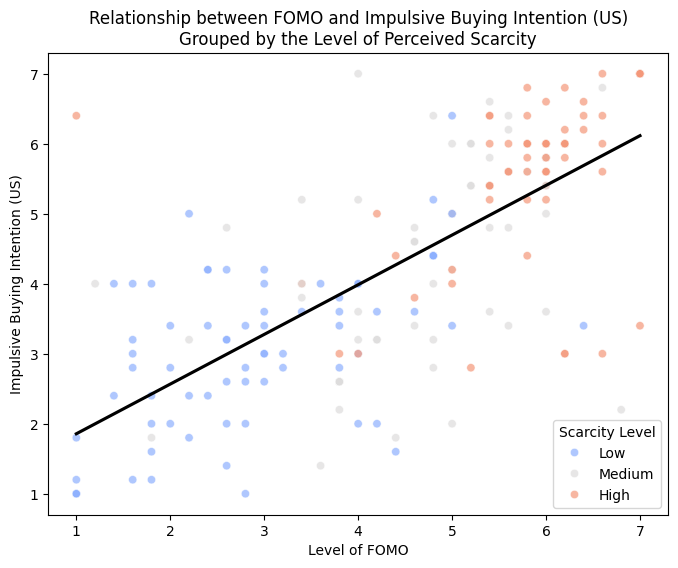

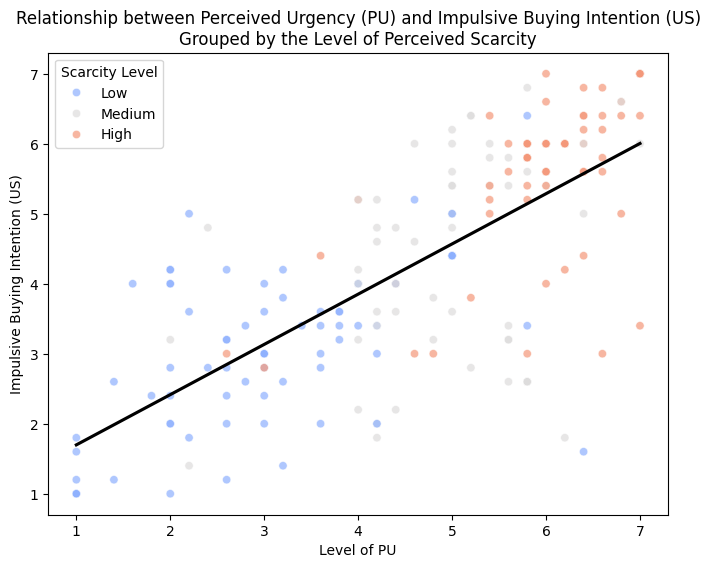

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Nếu chưa có nhóm scarcity thì chạy dòng này
if 'Scarcity_Group' not in data.columns:
    data['Scarcity_Group'] = pd.qcut(data['Scarcity'], q=3, labels=['Low', 'Medium', 'High'])

# Tùy chọn 1: Biểu đồ tán xạ FOMO vs US (chia theo nhóm Scarcity)
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='FOMO', y='US', hue='Scarcity_Group', palette='coolwarm', alpha=0.7)
sns.regplot(data=data, x='FOMO', y='US', scatter=False, color='black', ci=None)
plt.title('Relationship between FOMO and Impulsive Buying Intention (US)\nGrouped by the Level of Perceived Scarcity')
plt.xlabel('Level of FOMO')
plt.ylabel('Impulsive Buying Intention (US)')
plt.legend(title='Scarcity Level')
plt.savefig('fomo đến us group')
plt.show()

# Tùy chọn 2: Biểu đồ tán xạ PU vs US (chia theo nhóm Scarcity)
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x='PU', y='US', hue='Scarcity_Group', palette='coolwarm', alpha=0.7)
sns.regplot(data=data, x='PU', y='US', scatter=False, color='black', ci=None)
plt.title('Relationship between Perceived Urgency (PU) and Impulsive Buying Intention (US)\nGrouped by the Level of Perceived Scarcity')
plt.xlabel('Level of PU')
plt.ylabel('Impulsive Buying Intention (US)')
plt.legend(title='Scarcity Level')
plt.savefig('pu đến us group')
plt.show()




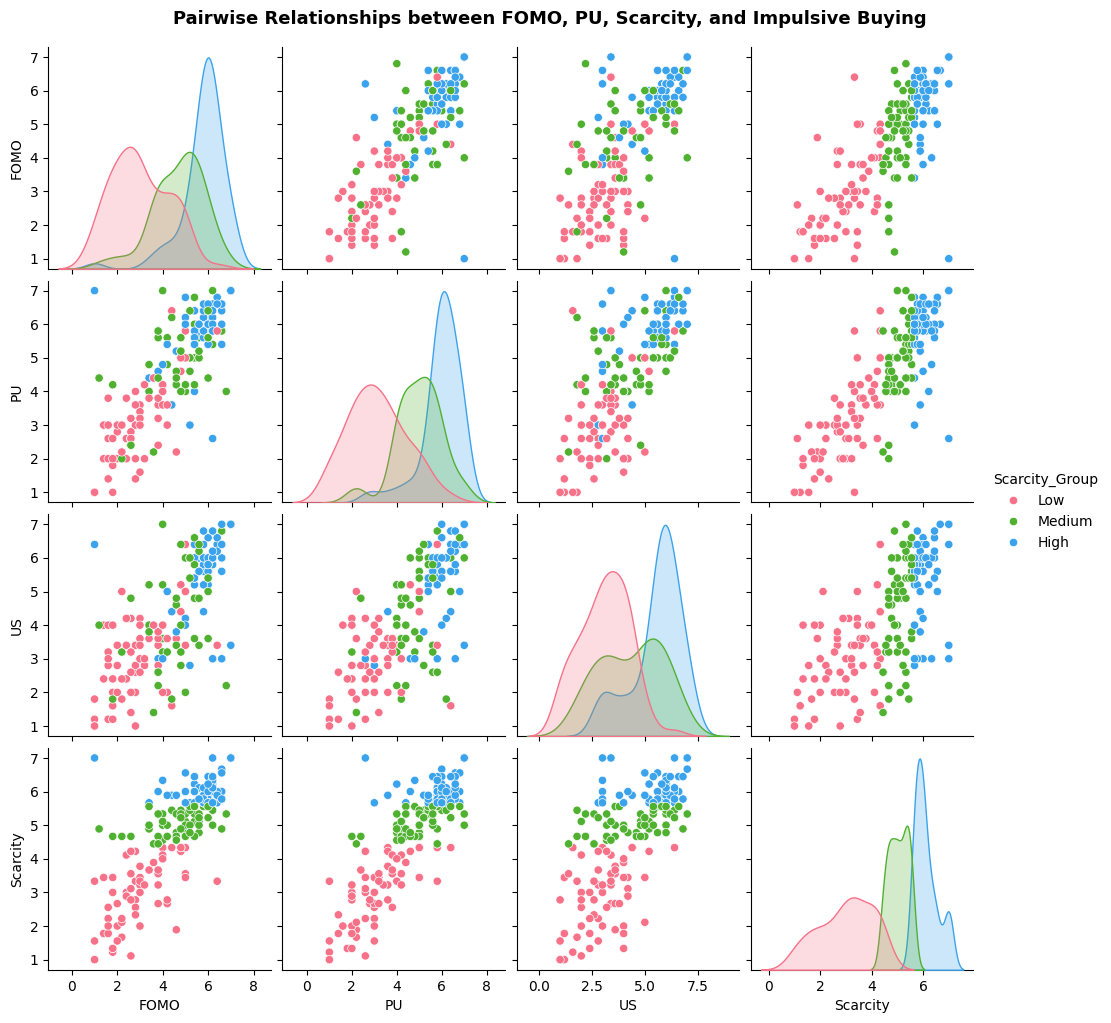

In [29]:
sns.pairplot(
    data,
    vars=["FOMO", "PU", "US", "Scarcity"],
    hue="Scarcity_Group",
    palette="husl",
    diag_kind="kde"
)
plt.suptitle("Pairwise Relationships between FOMO, PU, Scarcity, and Impulsive Buying", y=1.02, fontsize=13, fontweight='bold')
plt.savefig('pairwise')
plt.show()


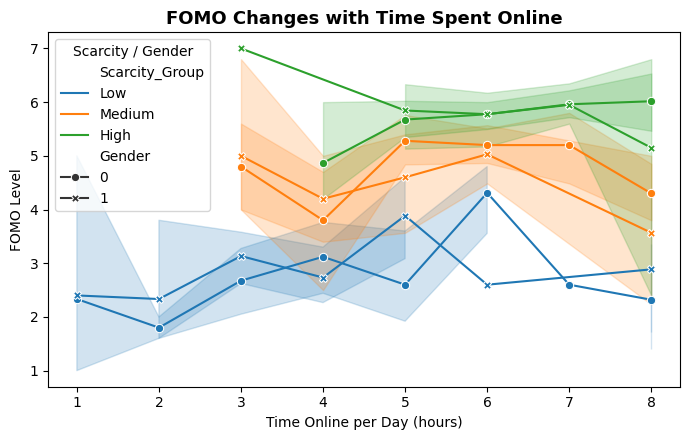

In [40]:
plt.figure(figsize=(7,4.5))
sns.lineplot(
    data=data,
    x='TOUI', y='FOMO',
    hue='Scarcity_Group',
    style='Gender',
    markers=True,
    dashes=False,
    palette='tab10'
)
plt.title('FOMO Changes with Time Spent Online', fontsize=13, weight='bold')
plt.xlabel('Time Online per Day (hours)')
plt.ylabel('FOMO Level')
plt.legend(title='Scarcity / Gender')
plt.tight_layout()
plt.show()


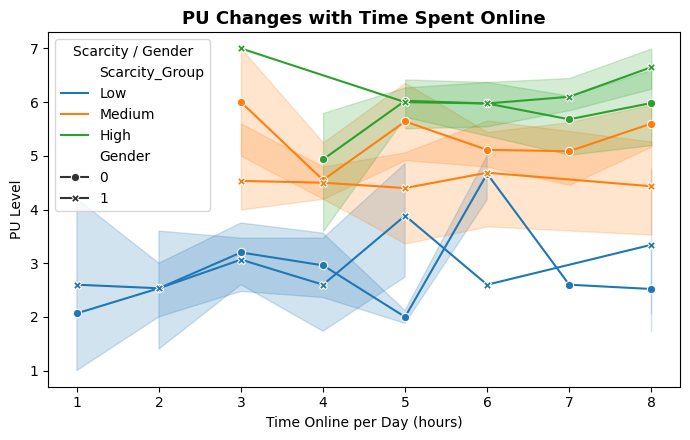

In [44]:
plt.figure(figsize=(7,4.5))
sns.lineplot(
    data=data,
    x='TOUI', y='PU',
    hue='Scarcity_Group',
    style='Gender',
    markers=True,
    dashes=False,
    palette='tab10'
)
plt.title('PU Changes with Time Spent Online', fontsize=13, weight='bold')
plt.xlabel('Time Online per Day (hours)')
plt.ylabel('PU Level')
plt.legend(title='Scarcity / Gender')
plt.tight_layout()
plt.show()
